In [ ]:
"""
1. What is a Decision Tree?
A Decision Tree is a model that makes decisions using a tree-like structure.
Machine Learning me ye classification aur regression dono ke liye use hoti hai.

- Root Node: Starting question (feature + threshold)
- Internal Nodes: Middle questions (further splits)
- Leaf Nodes: Final decision/output (e.g., Disease = Yes/No)


2. How it Works (Step-by-Step)
Step 1: Model looks at all features.
- Example features: Age, Thalach (max heart rate), Height

Step 2: For each feature, model tries multiple thresholds.
- Thalach < 140, Thalach < 150, Thalach < 160
- Age < 40, Age < 50, Age < 60
- Height < 4.5, Height < 5, Height < 6

Step 3: For each threshold, model checks how well the question separates the target (Disease Yes/No).

Step 4: Measures quality using:
- Gini Impurity
- Information Gain

Step 5: Best split (lowest Gini / highest Info Gain) becomes the Root Node.

Step 6: Recursive Splitting
- Left and Right branches created from Root Node.
- For each branch, model repeats the process with remaining features.
- If a branch becomes 100% pure (all same class), it becomes a Leaf Node.
- Otherwise, further splits continue.


3. Example with Percentages
Root Node: Thalach < 160?

Data distribution:

Left branch (Thalach < 160): 70% Disease Yes, 30% No
Right branch (Thalach >= 160): 0% Disease Yes, 100% No

- Left branch → mixed → further split using Age or Height
- Right branch → pure → directly Leaf Node (Disease = No)

Left branch example:
- Next question: Age < 60
  - Age < 60 → Disease = Yes
  - Age >= 60 → Disease = No
- Both leaf nodes are now 100% pure → no further splitting


4. Yes/No Splits
- Every question split is binary (Yes/No or True/False)
- Numerical feature: "Thalach < 160?" → Yes branch, No branch
- Categorical feature: "Gender = Male?" → Yes branch, No branch


5. Gini Impurity:
Gini impurity measures how mixed the classes are in a node.
Formula:
    Gini = 1 - (p1^2 + p2^2)
where p1 and p2 are proportions of samples in each class
Example:
    If 9 samples are positive and 6 are negative:
    p1 = 9/15 = 0.6
    p2 = 6/15 = 0.4
    G_parent = 1 - (0.6^2 + 0.4^2) = 0
    
Splitting Data (Example: "Age < 40?"):
    After the split, we get two groups (Left and Right):
    Left group (<40):
        8 samples → 6 positive, 2 negative
        p1 = 6/8 = 0.75, p2 = 0.25
        G_left = 1 - (0.75^2 + 0.25^2) = 0.
    Right group (>=40):
        7 samples → 3 positive, 4 negative
        p1 = 3/7 ≈ 0.43, p2 = 0.57
        G_right = 1 - (0.43^2 + 0.57^2) = 0.4
Weighted Gini after the Split:
    Combine impurities based on sample size:
      G_split = (n_left / n_total) * G_left + (n_right / n_total) * G_right
      Example:
        n_left = 8, n_right = 7, n_total = 15
        G_split = (8/15)*0.375 + (7/15)*0.4902 = 0.43

6. Information Gain:
  Measures how much impurity is reduced after the split.
  Formula:
      Gain = G_parent - G_split
  Example:
      Gain = 0.48 - 0.43 = 0.05

- This means impurity decreased by 0.05 after the split.
- Higher Information Gain -> better split


7. Summary Rules
- Root node = best split (lowest Gini / highest Info Gain)
- Branches = recursive splitting using remaining features
- Leaf node = branch with 100% pure data → final decision
- Each split is Yes/No
- Tree stops splitting when:
  - Branch becomes pure
  - Or max depth / minimum samples limit reached
"""

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
x = df.drop("target", axis=1)
y = df["target"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [ ]:
# criterion = "gini" means impurity will be measured using Gini Index 
# and Information Gain will be computed based on gini values.
# max_depth = maximum levels allowed in the tree (prevents overfitting)
# random_state = ensures reproducible results
model_gini = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
model_gini.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
# criterion = "entropy" means impurity will be measured using Entropy
# and Information Gain will be computed based on entropy values.
model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
model_entropy.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
# Model predictions
y_pred_gini = model_gini.predict(X_test)
y_pred_entropy = model_entropy.predict(X_test)

In [ ]:
# Model Evaluation — Accuracy & Classification Report
print("Gini Tree:\n")
print(accuracy_score(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))

print("\nEntropy Tree:\n")
print(accuracy_score(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

Gini Tree:

0.7704918032786885
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        23
           1       0.83      0.79      0.81        38

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.78      0.77      0.77        61


Entropy Tree:

0.7868852459016393
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.86      0.79      0.82        38

    accuracy                           0.79        61
   macro avg       0.77      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



Text(0.5, 1.0, 'Confusion Matrix - Entropy')

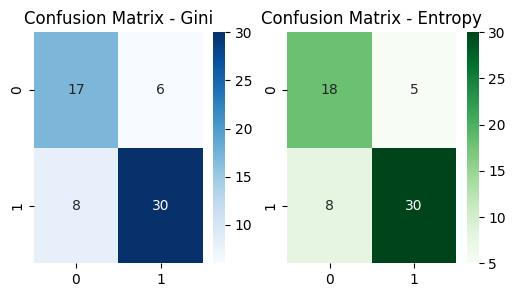

In [ ]:
# Confusion Matrix Visualization for both models
plt.figure(figsize=(6,3))

# Confusion Matrix for Gini
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_gini), annot=True, cmap="Blues")
plt.title("Confusion Matrix - Gini")

# Confusion Matrix for Entropy
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_entropy), annot=True, cmap="Greens")
plt.title("Confusion Matrix - Entropy")

Text(0.5, 1.0, 'Decision Tree - Entropy')

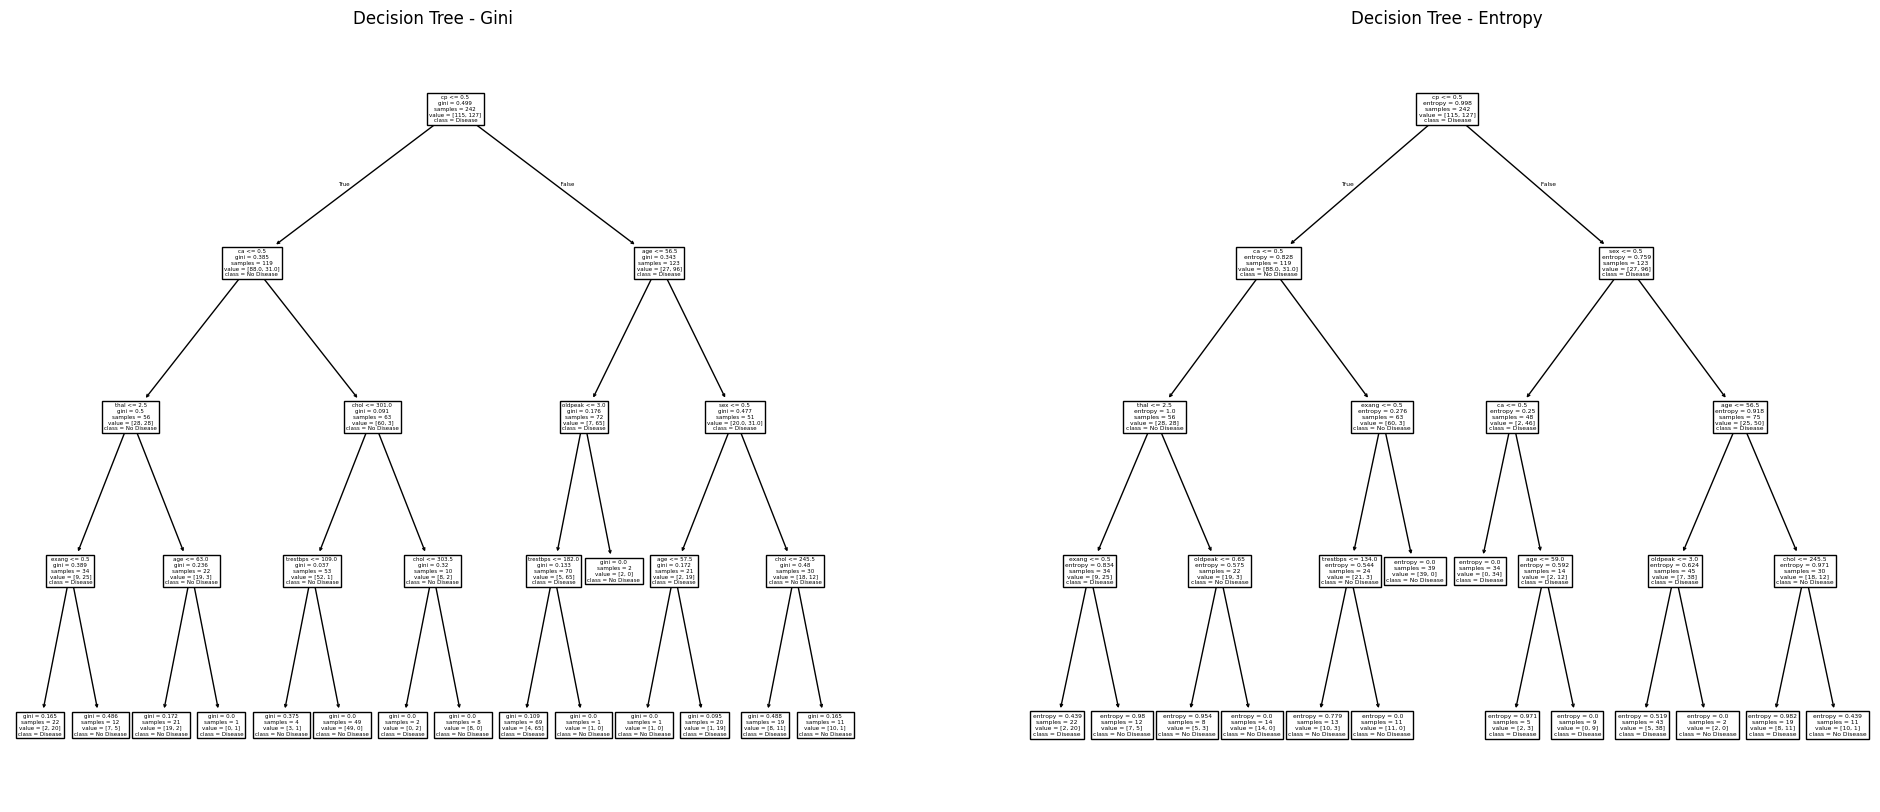

In [ ]:
# Plot the Decision Trees (for visualization)
plt.figure(figsize=(24, 10))

# Gini Tree
plt.subplot(1,2,1)
plot_tree(model_gini, feature_names=x.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree - Gini")

# Entropy Tree
plt.subplot(1,2,2)
plot_tree(model_entropy, feature_names=x.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree - Entropy")

#### Decision Tree with min_samples_split

In [ ]:
# min_samples_split = minimum number of samples required to split an internal node
# Helps control tree growth and reduce overfitting
model_gini_with_split = DecisionTreeClassifier(criterion="gini", min_samples_split=10, random_state=42)
model_gini_with_split.fit(X_train, y_train)

model_entropy_with_split = DecisionTreeClassifier(criterion="entropy", min_samples_split=10, random_state=42)
model_entropy_with_split.fit(X_train, y_train)

y_pred_gini_with_split = model_gini.predict(X_test)
y_pred_entropy_with_split = model_entropy.predict(X_test)

Text(0.5, 1.0, 'Decision Tree - Entropy with Split')

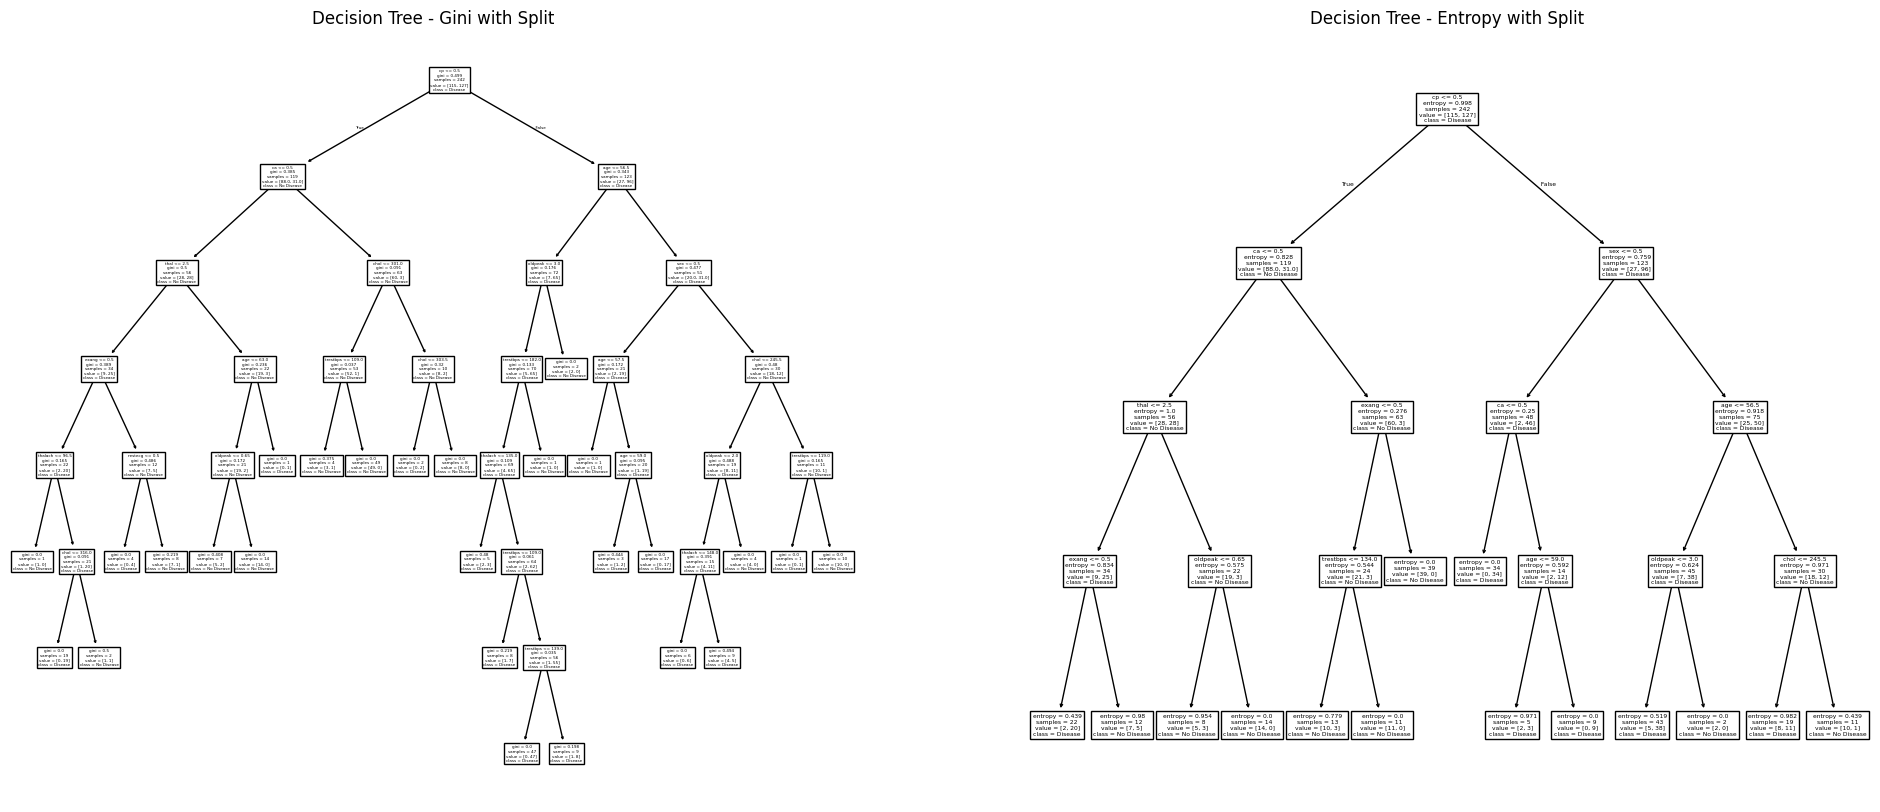

In [62]:
plt.figure(figsize=(24, 10))
plt.subplot(1,2,1)
plot_tree(model_gini_with_split, feature_names=x.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree - Gini with Split")
plt.subplot(1,2,2)
plot_tree(model_entropy_with_split, feature_names=x.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree - Entropy with Split")

#### Decision Tree with min_samples_leaf

In [ ]:
# min_samples_leaf = minimum number of samples that a leaf node must have
# Prevents small leaves with very few samples
model_gini_with_leaf = DecisionTreeClassifier(criterion="gini", min_samples_leaf=5, random_state=42)
model_gini_with_leaf.fit(X_train, y_train)

model_entropy_with_leaf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=5, random_state=42)
model_entropy_with_leaf.fit(X_train, y_train)

y_pred_gini_with_leaf = model_gini.predict(X_test)
y_pred_entropy_with_leaf = model_entropy.predict(X_test)

Text(0.5, 1.0, 'Decision Tree - Entropy with Leaf')

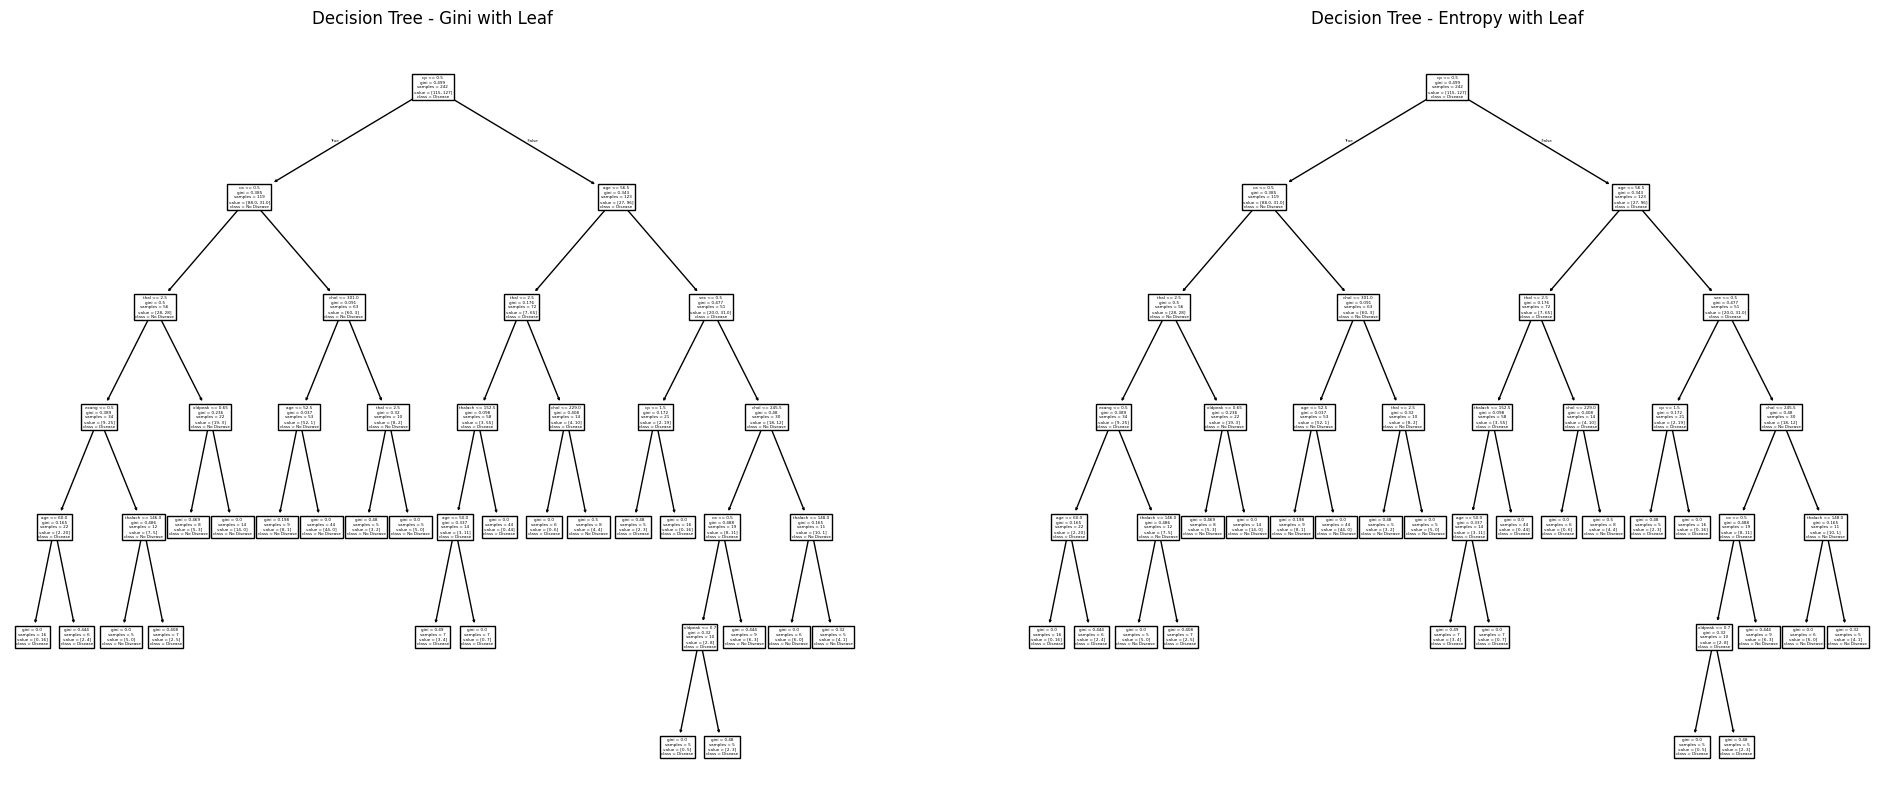

In [64]:
plt.figure(figsize=(24, 10))
plt.subplot(1,2,1)
plot_tree(model_gini_with_leaf, feature_names=x.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree - Gini with Leaf")
plt.subplot(1,2,2)
plot_tree(model_gini_with_leaf, feature_names=x.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree - Entropy with Leaf")

### Decision Tree combining all hyperparameters

In [ ]:
# Here, we control the tree depth, split size, and leaf size all together
model_gini_with_all_features = DecisionTreeClassifier(criterion="gini", min_samples_leaf=5, max_depth=4, min_samples_split=10, random_state=42)
model_gini_with_all_features.fit(X_train, y_train)

model_entropy_with_all_features = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=5, max_depth=4, min_samples_split=10, random_state=42)
model_entropy_with_all_features.fit(X_train, y_train)

y_pred_gini_with_all_features = model_gini.predict(X_test)
y_pred_entropy_with_all_features = model_entropy.predict(X_test)

Text(0.5, 1.0, 'Decision Tree - Entropy with Leaf')

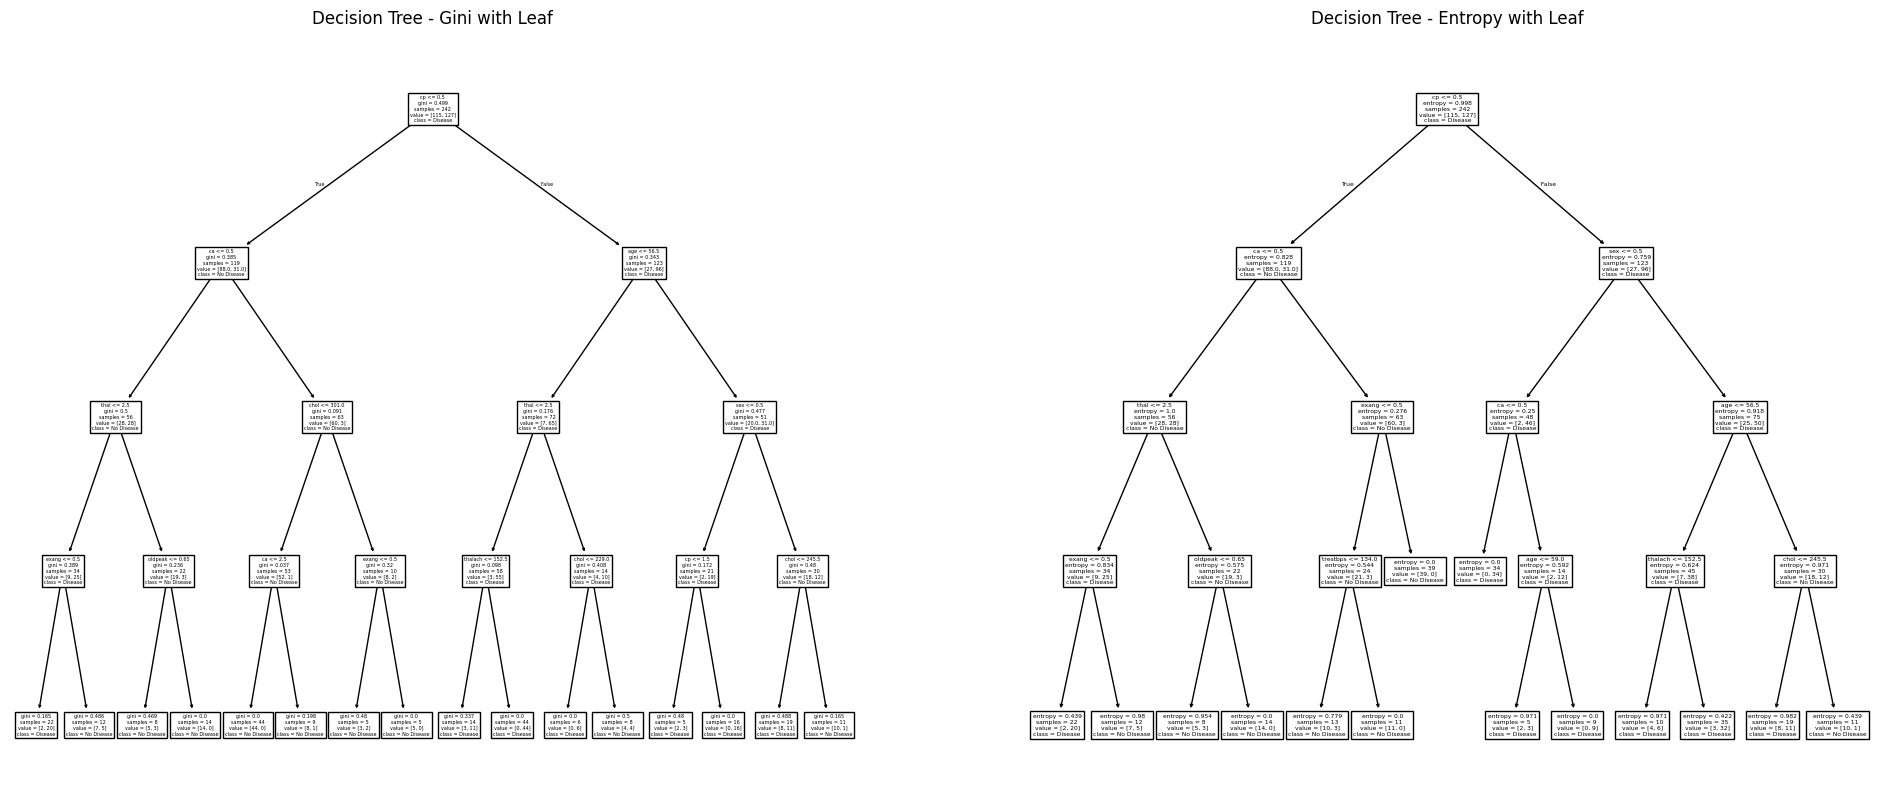

In [67]:
plt.figure(figsize=(24, 10))
plt.subplot(1,2,1)
plot_tree(model_gini_with_all_features, feature_names=x.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree - Gini with Leaf")
plt.subplot(1,2,2)
plot_tree(model_entropy_with_all_features, feature_names=x.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree - Entropy with Leaf")